In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and Stats about dataset

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
# Describe
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
# Shape of Dataset
df.shape

(344, 8)

In [5]:
# Column Names
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [6]:
# Penguin Species
print(df['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [7]:
# Checking info of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [8]:
# Top 10 Rows of DataFrame
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


## Data Preprocessing

In [9]:
# Dropping Null Values
df.dropna(inplace=True, axis=0)

In [10]:
# Converting categorical data to numerical data
df['species'] = df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df["island"] = df["island"].map({"Torgersen":0, "Biscoe":1, "Dream":2})
df["sex"] = df["sex"].map({"male":0, "female":1})

In [11]:
# Creating X and y Labels
y = df["sex"].values
X = df.drop(["sex"], axis = 1)

In [12]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,0,39.1,18.7,181.0,3750.0,2007
1,0,0,39.5,17.4,186.0,3800.0,2007
2,0,0,40.3,18.0,195.0,3250.0,2007
4,0,0,36.7,19.3,193.0,3450.0,2007
5,0,0,39.3,20.6,190.0,3650.0,2007


In [13]:
# Normalize features and rescale between 0 and 1
X['bill_length_mm'] = (X['bill_length_mm'] - X['bill_length_mm'].min()) / (X['bill_length_mm'].max() - X['bill_length_mm'].min())
X['bill_depth_mm'] = (X['bill_depth_mm'] - X['bill_depth_mm'].min()) / (X['bill_depth_mm'].max() - X['bill_depth_mm'].min())
X['flipper_length_mm'] = (X['flipper_length_mm'] - X['flipper_length_mm'].min()) / (X['flipper_length_mm'].max() - X['flipper_length_mm'].min())
X['body_mass_g'] = (X['body_mass_g'] - X['body_mass_g'].min()) / (X['body_mass_g'].max() - X['body_mass_g'].min())
X['species'] = (X['species'] - X['species'].min()) / (X['species'].max() - X['species'].min())
X['island'] = (X['island'] - X['island'].min()) / (X['island'].max() - X['island'].min())
X['year'] = (X['year'] - X['year'].min()) / (X['year'].max() - X['year'].min())

In [14]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0.0,0.0,0.254545,0.666667,0.152542,0.291667,0.0
1,0.0,0.0,0.269091,0.511905,0.237288,0.305556,0.0
2,0.0,0.0,0.298182,0.583333,0.389831,0.152778,0.0
4,0.0,0.0,0.167273,0.738095,0.355932,0.208333,0.0
5,0.0,0.0,0.261818,0.892857,0.305085,0.263889,0.0


In [15]:
# Converting df to Array
X = X.values

In [16]:
# Test Train Split
np.random.seed(5)
indices = np.random.permutation(len(X))
test_size = int(len(X) * 0.2)
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_test = y[indices[-test_size:]]

## LogitRegression Class Definition

In [17]:
class LogitRegression():
 
    def __init__(self,learning_rate=0.001, iterations=100000):
        # Takes as an input hyper-parameters: learning rate and the no of iterations
        self.learning_rate = learning_rate
        self.iterations  = iterations
        self.theta = None
        self.costs = None
        self.cost = None
        self.gradient = None
        self.n = None  # number of training examples

    def sigmoid(self,z): 
        # Define a sigmoid function
        return 1 / (1 + np.exp(-z))
        

    def cost_function(self, X, y):
        # Loss function for Logistic Regression
        h = self.sigmoid(np.dot(X, self.theta))
        self.cost = (-1 / self.n) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return self.cost

    def gradient_descent(self, X, y): 
        # Define current prediction y_hat for logistic regression
        y_hat = self.sigmoid(np.dot(X, self.theta))
        # Define gradient of the cost function
        self.gradient = (1 / self.n) * np.dot(X.T, (y_hat - y))
        # Update the parameters
        self.theta -= self.learning_rate * self.gradient
        # Return the updated parameters
        return self.theta

    def fit(self, X, y):
        # This method performs the training, Initialize weights, For a number of iterations,  Call gradient_descent function
        # Call cost function and keep it in an array
        np.random.seed(5)
        self.n = len(y)
        self.theta = np.random.uniform(0,1,size=X.shape[1])
        # self.theta = np.zeros(X.shape[1])
        self.costs = np.zeros(self.iterations)
        for i in range(self.iterations):
            self.gradient_descent(X, y)
            self.costs[i] = self.cost_function(X, y)

        # Plot the cost function
        self.plot_cost()
    
    def plot_cost(self):
        # This method plots the cost function
        plt.plot(range(self.iterations), self.costs)
        plt.xlabel("Iterations")
        plt.ylabel("$J(\Theta)$")
        plt.title("Cost function using Gradient Descent")
        plt.show()
    
    def predict(self,X):
        # This method performs the prediction, Call sigmoid function and return the predicted values
        return self.sigmoid(np.dot(X, self.theta))
    
    def accuracy(self, X, y):
        # This method calculates the accuracy of the model
        y_pred = np.where(self.predict(X) >= 0.5, 1, 0)
        return np.mean(y_pred == y)
    

## Fitting the Model

### Learning Rate = 1e-3 Iterations = 100000

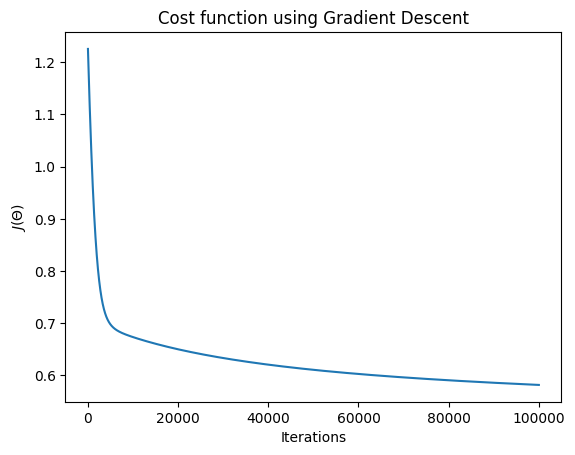

Train Accuracy:  0.7453183520599251
Test Accuracy:  0.7424242424242424


In [18]:
# Initialize the model
model = LogitRegression(learning_rate=1e-3, iterations=100000)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_train)

# Print the accuracy
print("Train Accuracy: ", model.accuracy(X_train, y_train))
print("Test Accuracy: ", model.accuracy(X_test, y_test))

### Learning Rate = 1e-4 Iterations = 100000

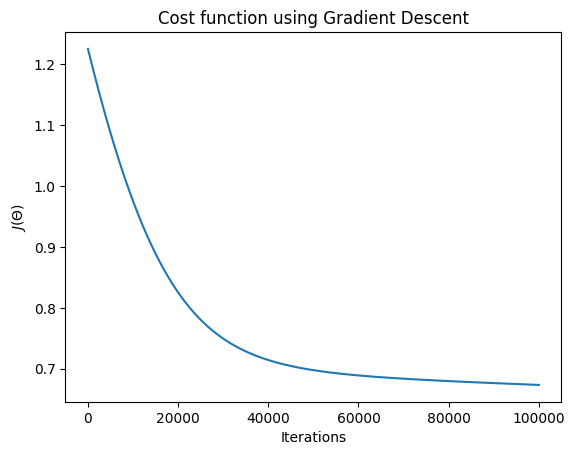

Train Accuracy:  0.5692883895131086
Test Accuracy:  0.5606060606060606


In [19]:
# Initialize the model
model = LogitRegression(learning_rate=1e-4, iterations=100000)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_train)

# Print the accuracy
print("Train Accuracy: ", model.accuracy(X_train, y_train))
print("Test Accuracy: ", model.accuracy(X_test, y_test))

### Learning Rate = 1e-2 Iterations = 100000

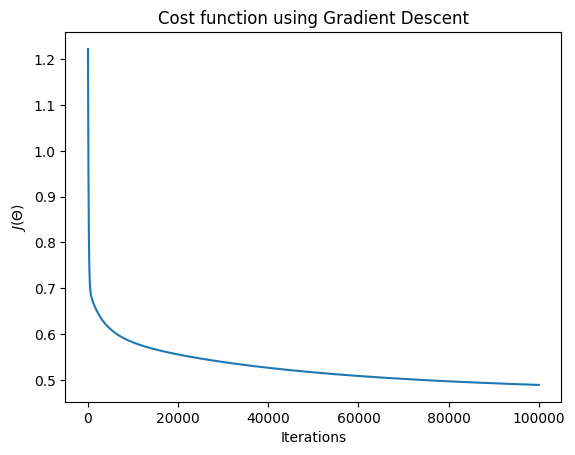

Train Accuracy:  0.7715355805243446
Test Accuracy:  0.8181818181818182


In [20]:
# Initialize the model
model = LogitRegression(learning_rate=1e-2, iterations=100000)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_train)

# Print the accuracy
print("Train Accuracy: ", model.accuracy(X_train, y_train))
print("Test Accuracy: ", model.accuracy(X_test, y_test))

#### From the above three Trials we observe the best accuracy with Learning Rate = 1e-2 & Iterations = 100000
- Train Accuracy: 77%
- Test Accuracy: 81%

## Exporting Weights as Pickle

In [21]:
import pickle

# Save the model
with open('model_weights.pickle', 'wb') as f:
    pickle.dump(model.theta, f)

In [22]:
# Check stored weights
with open('model_weights.pickle', 'rb') as f:
    model_weights = pickle.load(f)
    
print(model_weights)

[ 5.02534983  1.48966146 -6.1907693   1.64481765  1.40642877 -6.92148007
  1.02465215]
